# DeepTesla

## 数据预处理

In [1]:
import skvideo.io
import cv2
import os, sys
import pandas as pd
from tqdm import *

In [4]:
# read video Data
for i in tqdm(range(1, 11)):
    video_path = video_path = os.path.abspath(os.path.expanduser("./data/epoch{:0>2d}.mkv".format(i)))
    csv_path = "./data/epoch{:0>2d}_steering.csv".format(i)
    dir_name = "./data/epoch{:0>2d}_front_frames".format(i)
    
    print("Extracting video: {}.".format(video_path))
    os.mkdir(dir_name)
    frame_id = pd.read_csv(csv_path)['ts_micro'].tolist()
    video = skvideo.io.vreader(video_path)
    count = 0
    for frame in video:
        cv2.imwrite("{}/{}.jpg".format(dir_name, frame_id[count-1]), frame)
        count += 1

  0%|          | 0/10 [00:00<?, ?it/s]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch01.mkv.


 10%|█         | 1/10 [00:06<00:57,  6.43s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch02.mkv.


 20%|██        | 2/10 [00:21<01:12,  9.03s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch03.mkv.


 30%|███       | 3/10 [00:33<01:10, 10.04s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch04.mkv.


 40%|████      | 4/10 [00:45<01:03, 10.61s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch05.mkv.


 50%|█████     | 5/10 [00:57<00:55, 11.05s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch06.mkv.


 60%|██████    | 6/10 [01:09<00:45, 11.34s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch07.mkv.


 70%|███████   | 7/10 [01:22<00:34, 11.62s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch08.mkv.


 80%|████████  | 8/10 [01:34<00:23, 11.72s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch09.mkv.


 90%|█████████ | 9/10 [01:46<00:11, 11.85s/it]

Extracting video: /home/meirtz/Desktop/mlnd/DeepTesla/data/epoch10.mkv.


100%|██████████| 10/10 [01:58<00:00, 11.94s/it]


In [83]:
os.mkdir("./images")
os.mkdir("./images/train")
os.mkdir("./images/validation")
os.mkdir("./images/test")

# Create train dataset symlink
for i in range(1, 8):
    source_dir_name = "/home/meirtz/Desktop/mlnd/DeepTesla/data/epoch{:0>2d}_front_frames/".format(i)
    traget_dir_name = "/home/meirtz/Desktop/mlnd/DeepTesla/images/train/"
    for filename in os.listdir(source_dir_name):
        if filename.endswith(".jpg"):
            try:
                os.symlink(source_dir_name+filename, traget_dir_name+filename)
            except OSError as err:
                print(err)
            
# Create validation dataset symlink
for i in range(8, 9):
    source_dir_name = "/home/meirtz/Desktop/mlnd/DeepTesla/data/epoch{:0>2d}_front_frames/".format(i)
    traget_dir_name = "/home/meirtz/Desktop/mlnd/DeepTesla/images/validation/"
    for filename in os.listdir(source_dir_name):
        if filename.endswith(".jpg"):
            try:
                os.symlink(source_dir_name+filename, traget_dir_name+filename)
            except OSError as err:
                print(err)
            
# Create test dataset symlink
for i in range(9, 11):
    source_dir_name = "/home/meirtz/Desktop/mlnd/DeepTesla/data/epoch{:0>2d}_front_frames/".format(i)
    traget_dir_name = "/home/meirtz/Desktop/mlnd/DeepTesla/images/test/"
    for filename in os.listdir(source_dir_name):
        if filename.endswith(".jpg"):
            try:
                os.symlink(source_dir_name+filename, traget_dir_name+filename)
            except OSError as err:
                print(err)

[Errno 17] File exists: '/home/meirtz/Desktop/mlnd/DeepTesla/data/epoch04_front_frames/1464303774991807.jpg' -> '/home/meirtz/Desktop/mlnd/DeepTesla/images/train/1464303774991807.jpg'
[Errno 17] File exists: '/home/meirtz/Desktop/mlnd/DeepTesla/data/epoch06_front_frames/1464304044891807.jpg' -> '/home/meirtz/Desktop/mlnd/DeepTesla/images/train/1464304044891807.jpg'


## Checkpoint


划分数据集。epoch1-7为训练集，epoch9为验证集，epoch9和10为测试集。

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import os
from tqdm import *
%matplotlib inline

-1.0


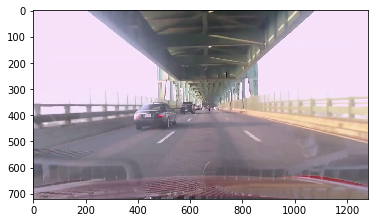

In [4]:
y = pd.read_csv("./data/epoch01_steering.csv")
y = y[y['ts_micro']==1464650070285914]
print(y['wheel'].values[0])
"1464650070285914.jpg".split(".")
img = cv2.imread(os.readlink("./images/train/1464303774991807.jpg"))
plt.imshow(img)

In [ ]:
def read_dataset():
    train_dir = "./images/train/"
    valid_dir = "./images/validation/"
    test_dir = "./images/test/"
    X_train = []
    y_train = []
    X_valid = []
    y_valid = []
    X_test = []
    y_test = []
    
    y_s = [] #= pd.read_csv("./data/epoch01_steering.csv")
    for i in range(1, 11):
        y_s.append(pd.read_csv("./data/epoch{:0>2d}_steering.csv".format(i)))
        #print(i)
    y = pd.concat(y_s) 
    #print(y.shape)
    y = y.drop('frame', 1)
    #print(y)
        
    for filename in tqdm(os.listdir(train_dir)):
        fid = int(filename.split(".")[0])
        target = os.readlink(train_dir+filename)
        #print(target)
        X_train.append(cv2.imread(target))
        y_train.append(y[y['ts_micro']==fid]['wheel'].values[0])
    
    for filename in tqdm(os.listdir(valid_dir)):
        fid = int(filename.split(".")[0])
        target = os.readlink(train_dir+filename)
        X_valid.append(cv2.imread(target))
        y_valid.append(y[y['ts_micro']==fid]['wheel'].values[0])
        
    for filename in tqdm(os.listdir(test_dir)):
        fid = int(filename.split(".")[0])
        target = os.readlink(train_dir+filename)
        X_test.append(cv2.imread(target))
        y_test.append(y[y['ts_micro']==fid]['wheel'].values[0])
    print(len(X_train))
    print(len(y_train))
    print(len(X_valid))
    print(len(y_valid))
    print(len(X_test))
    print(len(y_test))
    
    return np.array(X_train), np.array(y_train), np.array(X_valid), np.array(y_valid), np.array(X_test), np.array(y_test)

X_train, y_train, X_valid, y_valid, X_test, y_test = read_dataset()
    

 64%|██████▍   | 11923/18520 [02:21<01:21, 80.59it/s]

In [ ]:
print(X_train[1])